# References:

[Tensorflow Online Playgroud](https://playground.tensorflow.org/)

[Andrew NG coursera courses - deeplearning.ai](https://www.coursera.org/learn/neural-networks-deep-learning)

[Pytorch Tutorials](https://pytorch.org/tutorials/)

[Udacity: Intro to Deep Learning with Pytorch](https://www.udacity.com/course/deep-learning-pytorch)

# Introdution to Deep Learning with Pytorch


This notebook aims to help to create a bit of intuition about deep learning.

To explore the basic concepts we will at first create a basic classifier with numpy  from scratch. **NumPy** is the fundamental package for scientific computing in Python, it is a very good tool to manipulate matrices and optimize the computation calculus. 

Following will improve the code using **Pytorch** library. It is a Numpy replacement that allows you to use GPU process  power easily. It also has a lot of convenient methods designed especially for deep learning deep learning research that provides maximum flexibility and speed.

# Datasets

We will be using synthetic datasets to build intuition about deep networks. 

Scikit-learn includes various random sample generators that can be used to build artificial datasets of controlled size and complexity.

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_random_dataset_0011.png" width=600>



In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

import numpy as np
np.random.seed(42)

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='white',
        rc={
            "figure.figsize": [10, 10],
            "axes.edgecolor": "lightgray",
            "axes.labelcolor": "dimgray",
            "axes.spines.right": False,
            "axes.spines.top": False,
            "lines.solid_capstyle": "round",
            "text.color": "dimgray",
            "xtick.bottom": False,
            "xtick.color": "dimgrey",
            "xtick.direction": "out",
            "xtick.top": False,
            "ytick.color": "dimgrey",
            "ytick.direction": "out",
            "ytick.left": False,
            "ytick.right": False,
        })

sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":18})

In [2]:
def build_mesh(X, y, step=0.1):
    """Buid a mesh to plot decision boundaries"""
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    x = np.arange(x_min, x_max + step, step=step)
    y = np.arange(y_min, y_max + step, step=step)
    xx, yy = np.meshgrid(x, y)
    X_GRID = np.column_stack([xx.flatten(), yy.flatten()])
    X_GRID = X_GRID.astype(np.float32)
    return xx, yy, X_GRID

# From Scracth with Numpy

First let's create a very simple dataset to play.

In [3]:
# dataset complexity params
BATCH_SIZE = 10
TRAIN_TEST_RATIO = 0.5
NOISE = 0.09
SAMPLES = 300
FACTOR = 0.2

# generate the synthetic dataset
X, y = datasets.make_blobs(
            n_samples=[SAMPLES//2, SAMPLES//2], 
            n_features=2, 
            cluster_std=1, 
            random_state=42,
            centers=[[2.5, 2.5], [-2.5, -2.5]]
        )

# reshape labels
y = y.reshape(-1, 1)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TRAIN_TEST_RATIO)

print('data:\n', X_train[:10])
print('labels:', y_train[:10].T)

data:
 [[-3.46492346 -1.81394854]
 [ 1.34900642  2.87569802]
 [-1.85462405 -1.13136844]
 [ 2.71409374  1.25426122]
 [ 3.01503527  3.01378595]
 [-3.31822068 -0.40761272]
 [ 2.79612028  2.76105527]
 [-3.94808434 -3.90746377]
 [-2.76987494 -3.47876372]
 [-0.81285836 -1.61836024]]
labels: [[1 0 1 0 0 1 0 1 1 1]]


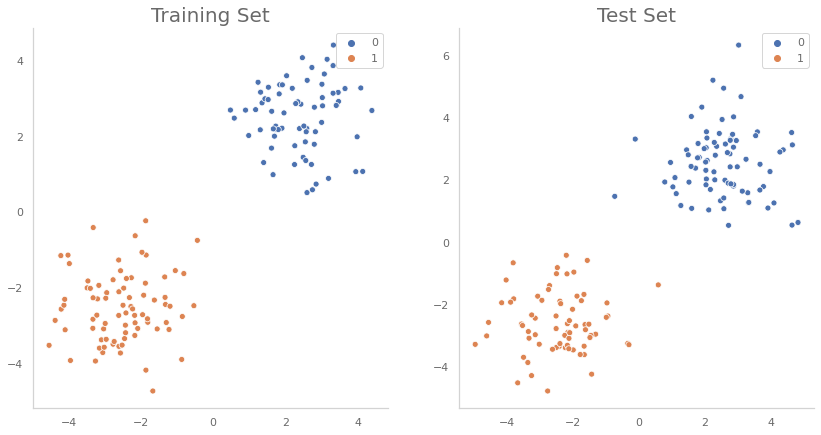

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(7*2, 7))

sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train.flatten(), ax=axs[0])
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test.flatten(), ax=axs[1])

axs[0].set_title("Training Set")
axs[1].set_title("Test Set");

## The Model

In most cases a deep learning networks loops through the following steps:

* Forward propagation
* Calculate the Loss function
* Back propagation

After some iterations (aka: epochs), the solution will converge to an optimal minimum for loss function (aka: cost function).

## Forward Propagation
Forward propagation is how neural networks make predictions. Input data is “forward propagated” through the network layer by layer to the final layer which outputs a prediction.

Example with one hidden layer and input $x^{(i)}$:

$$Z^{[1]} =  W^{[1]} X + b^{[1]}\tag{1}$$ 
$$A^{[1]} = \tanh(Z^{[1]})\tag{2}$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}\tag{3}$$
$$\hat{y} = A^{[2]} = \sigma(Z^{[2]})\tag{4}$$
$$Y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } A^{[2]} > 0.5 \\ 0 & \mbox{otherwise} \end{cases}\tag{5}$$

The matrices that we wil be updating is the weights($W$) ans the bias term ($b$). 

[Ref.: https://ml-cheatsheet.readthedocs.io/](https://ml-cheatsheet.readthedocs.io/en/latest/forwardpropagation.html#:~:text=Forward%20propagation%20is%20how%20neural,layer%20which%20outputs%20a%20prediction.)

## Back Propagation

The goals of backpropagation are straightforward: adjust each weight in the network using an optimizer (eg.: gradient descent).

$$dZ^{[2]} = A^{[2]} - Y\tag{1}$$
$$dW^{[2]} = \frac{1}{m} * A^{[1]T}dZ^{[2]}\tag{2}$$
$$db^{[2]} = \frac{1}{m} * np.sum(dZ^{[2]}, axis=0, keepdims=True)\tag{3}$$
$$dZ^{[1]} = dZ^{[2]}W^{[2]T} * g^{[1]'}(Z^{[1]})\tag{4}$$
$$dW^{[1]} = \frac{1}{m} * X^{T}dZ^{[1]}\tag{5}$$
$$db^{[2]} = \frac{1}{m} * np.sum(dZ^{[1]}, axis=0, keepdims=True)\tag{6}$$
    
[Ref.: https://ml-cheatsheet.readthedocs.io/](https://ml-cheatsheet.readthedocs.io/en/latest/forwardpropagation.html#:~:text=Forward%20propagation%20is%20how%20neural,layer%20which%20outputs%20a%20prediction.)

## Loss function
https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#loss-cross-entropy

$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large \right) \small \tag{6}$$

In [5]:
# m is number of observations
# D_in is input dimension;
# D_out is output dimension.d
# H hidden layers
m = X_train.shape[0]
D_in, D_out = 2, 1
H = 4

# Activation function
def sigmoid_np(x): return 1 / (1 + np.exp(-x))

# Randomly initialize weights
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)
b1 = np.zeros(shape=(1, H))
b2 = np.zeros(shape=(1, D_out))

In [6]:
learning_rate = 0.009
for epoch in range(500):
    # Forward pass: compute predicted y
    fc1 = np.dot(X_train, w1) + b1
    a1 = np.tanh(fc1)
    fc2 = np.dot(a1, w2) + b2
    y_pred = sigmoid_np(fc2)

    # Compute and print loss
    loss = -1/m * np.sum(y_train * np.log(y_pred) + (1 - y_train) * (np.log(1 - y_pred)))

    # Backprop to compute gradients of w1 and w2 with respect to loss
    dfc2 = y_pred - y_train
    dw2 = (1 / m) * np.dot(a1.T, dfc2)
    db2 = (1 / m) * np.sum(dfc2, axis=0, keepdims=True)
    dfc1 = np.multiply(np.dot(dfc2, w2.T), 1 - np.power(a1, 2))
    dw1 = (1 / m) * np.dot(X_train.T, dfc1)
    db1 = (1 / m) * np.sum(dfc1, axis=0, keepdims=True)

    
    # Update weights and bias
    w1 = w1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1
    w2 = w2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2

    if epoch % 100 == 0:
        print('loss:', np.squeeze(loss), end=' ')
        fc1 = np.dot(X_test, w1) + b1
        a1 = np.tanh(fc1)
        fc2 = np.dot(a1, w2) + b2
        y_pred = sigmoid_np(fc2).flatten().round()
        print('test accuracy:', metrics.accuracy_score(y_test, y_pred))

loss: 0.96380048236448 test accuracy: 0.0
loss: 0.43565470542304624 test accuracy: 0.9666666666666667
loss: 0.24534713967225938 test accuracy: 0.9666666666666667
loss: 0.1628793485969687 test accuracy: 0.98
loss: 0.1193847549341824 test accuracy: 0.9866666666666667


In [7]:
def predict_prob(X, w1, b1, w2, b2):
    fc1 = np.dot(X, w1) + b1
    a1 = np.tanh(fc1)
    fc2 = np.dot(a1, w2) + b2
    return sigmoid_np(fc2).flatten()

In [8]:
probs = predict_prob(X, w1, b1, w2, b2)

In [9]:
y_pred = probs.round()

In [10]:
xx, yy, X_GRID = build_mesh(X, y)

In [11]:
Z = predict_prob(X_GRID, w1, b1, w2, b2)
Z = Z.reshape(xx.shape)

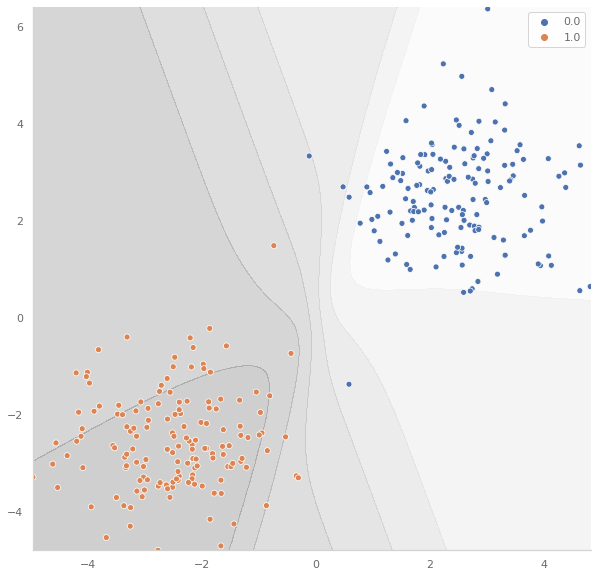

In [12]:
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.binary)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred.flatten())

# Binary Classification with a Hidden Layer - Pytorch

In [13]:
%time
import torch
from torch import tanh, sigmoid

dtype = torch.float

# create torch tensors

Xt_train = torch.from_numpy(X_train).float()
Xt_test = torch.from_numpy(X_test).float()
yt_train = torch.from_numpy(y_train)
yt_test = torch.from_numpy(y_test)

# m is number of observations
# D_in is input dimension;
# D_out is output dimension.d
m = Xt_train.shape[0]
D_in, D_out = 2, 1
H = 4

# Randomly initialize weights
w1 = torch.randn(D_in, H, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, dtype=dtype, requires_grad=True)
b1 = torch.zeros(1, H, dtype=dtype, requires_grad=True)
b2 = torch.zeros(1, D_out, dtype=dtype, requires_grad=True)

learning_rate = 0.009
for epoch in range(500):
    # Forward pass: compute predicted y
    fc1 = Xt_train @ w1 + b1
    a1 = tanh(fc1)
    fc2 = a1 @ w2 + b2
    y_pred = sigmoid(fc2)
    

    # Compute and print loss
    loss = -1 / m * torch.sum(yt_train * torch.log(y_pred) + (1 - yt_train) * (torch.log(1 - y_pred)))
    
    # Backprop to compute gradients of w1 and w2 with respect to loss using Autograd
    loss.backward()
   
    
    with torch.no_grad():

        # Update weights and bias
        w1 -= learning_rate * w1.grad
        b1 -= learning_rate * b1.grad
        w2 -= learning_rate * w2.grad
        b2 -= learning_rate * b2.grad
        
        # Manually zero the gradients after updating weights
        w1.grad.zero_()
        w2.grad.zero_()
        b1.grad.zero_()
        b2.grad.zero_()
    
    if epoch % 100 == 0:
        with torch.no_grad():
            print('loss:', np.squeeze(loss), end=' ')
            fc1 = Xt_test @ w1 + b1
            a1 = tanh(fc1)
            fc2 = a1 @ w2 + b2
            y_pred = sigmoid(fc2).numpy().flatten().round()
            print('test accuracy:', metrics.accuracy_score(yt_test, y_pred))

CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 4.05 µs
loss: tensor(0.1655, requires_grad=True) test accuracy: 0.9666666666666667
loss: tensor(0.0349, requires_grad=True) test accuracy: 0.9866666666666667
loss: tensor(0.0249, requires_grad=True) test accuracy: 0.9866666666666667
loss: tensor(0.0204, requires_grad=True) test accuracy: 0.9866666666666667
loss: tensor(0.0176, requires_grad=True) test accuracy: 0.9866666666666667


In [14]:
def predict_prob(X, w1, b1, w2, b2):
     with torch.no_grad():
        fc1 = X @ w1 + b1
        a1 = tanh(fc1)
        fc2 = a1 @ w2 + b2
        return sigmoid(fc2).numpy().flatten()

In [15]:
Xt = torch.from_numpy(X).float()
yt = torch.from_numpy(y)

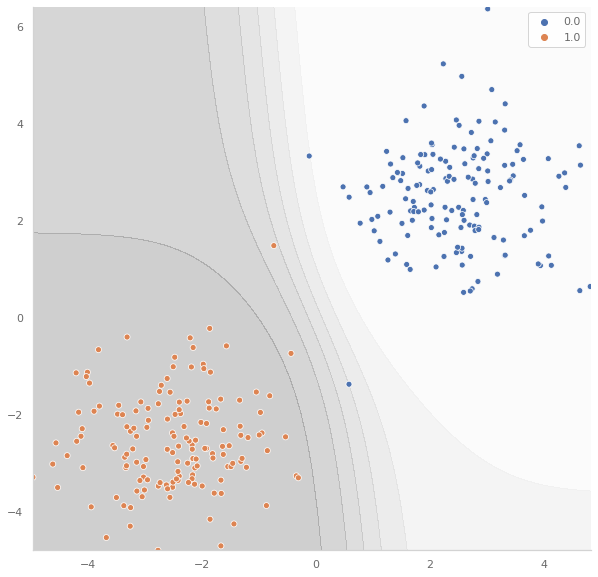

In [16]:
probs = predict_prob(Xt, w1, b1, w2, b2)
y_pred = probs.round()

# get decision bondaries
xx, yy, X_GRID = build_mesh(X, y)

Z = predict_prob(torch.from_numpy(X_GRID).float(), w1, b1, w2, b2)
Z = Z.reshape(xx.shape)

# plot
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.binary)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred.flatten())

# Functional Approuch

In [17]:
BATCH_SIZE = 10
TRAIN_TEST_RATIO = 0.5
NOISE = 0.09
SAMPLES = 300
FACTOR = 0.2

In [18]:
X, y = datasets.make_circles(n_samples=SAMPLES, noise=NOISE, factor=FACTOR)
X = X.astype(np.float32)
y = y.astype(np.float32).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TRAIN_TEST_RATIO)

Text(0.5, 1.0, 'Test Set')

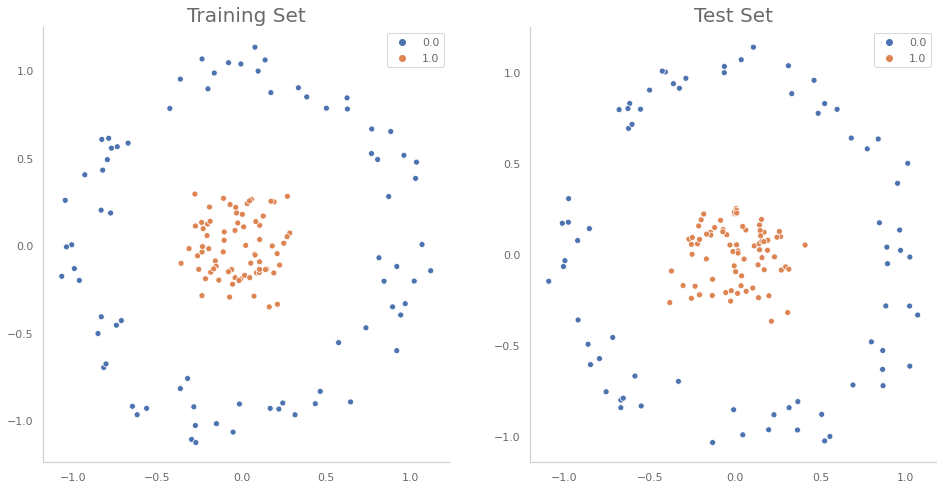

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(8*2, 8))

sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train.flatten(), ax=axs[0])
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test.flatten(), ax=axs[1])

axs[0].set_title("Training Set")
axs[1].set_title("Test Set")

In [20]:
import torch
from torch.utils.data import TensorDataset, DataLoader

In [21]:
train_ds = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
train_dl = DataLoader(train_ds, shuffle=True, batch_size=BATCH_SIZE)

test_ds = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

# Network

In [22]:
from torch import nn
import torch.nn.functional as F

D_in = 2
D_out = 1
H = 4

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(D_in, H)
        self.fc2 = nn.Linear(H, D_out)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        output = self.sigmoid(x)
        return output

In [23]:
# Training the model
epochs = 50
lr=0.03

model = Net()
print(model)

# binary cross entropy loss
loss_func = nn.BCELoss()
opt = torch.optim.Adam(model.parameters(), lr=lr)

for epoch in range(epochs):
    model.train()
    train_loss, accuracy = 0, 0
    for i, (xb, yb) in enumerate(train_dl, start=1):
        yhat = model(xb)
            
        opt.zero_grad()
        # calculate the loss and perform backprop
        loss = loss_func(yhat, yb)
        with torch.no_grad():
            train_loss += loss.item()
            accuracy += metrics.accuracy_score(yb, yhat.round())
        loss.backward()
        opt.step()
    
    if epoch % 10 == 0:
        model.eval()
        with torch.no_grad():
            xt, yt = test_ds.tensors
            yhat = model(xt)
            test_loss = round(loss_func(yhat, yt).item(), 2)
            train_loss = round(train_loss / i, 2)
            test_acc = round(metrics.accuracy_score(yt, yhat.round()), 2)
            train_acc = round(accuracy / i, 2)
            print("Epoch", epoch, 'loss:', train_loss, '(train)', test_loss, '(test)')
            print("Accuracy:", train_acc, '(train)', test_acc, '(test_acc)')


Net(
  (fc1): Linear(in_features=2, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Epoch 0 loss: 0.71 (train) 0.67 (test)
Accuracy: 0.51 (train) 0.69 (test_acc)
Epoch 10 loss: 0.45 (train) 0.41 (test)
Accuracy: 0.85 (train) 0.88 (test_acc)
Epoch 20 loss: 0.36 (train) 0.34 (test)
Accuracy: 0.87 (train) 0.88 (test_acc)
Epoch 30 loss: 0.35 (train) 0.32 (test)
Accuracy: 0.87 (train) 0.89 (test_acc)
Epoch 40 loss: 0.34 (train) 0.32 (test)
Accuracy: 0.87 (train) 0.87 (test_acc)


In [24]:
def predict(x, model):
    with torch.no_grad():
        yhat = model(x)
        return yhat

In [25]:
y_pred = predict(torch.from_numpy(X), model)
y_pred = np.round(y_pred)

In [26]:
xx, yy, X_GRID = build_mesh(X, y, step=0.1)
Z = predict(torch.from_numpy(X_GRID), model)

In [27]:
Z = Z.reshape(xx.shape)

In [28]:
Z.shape

torch.Size([24, 24])

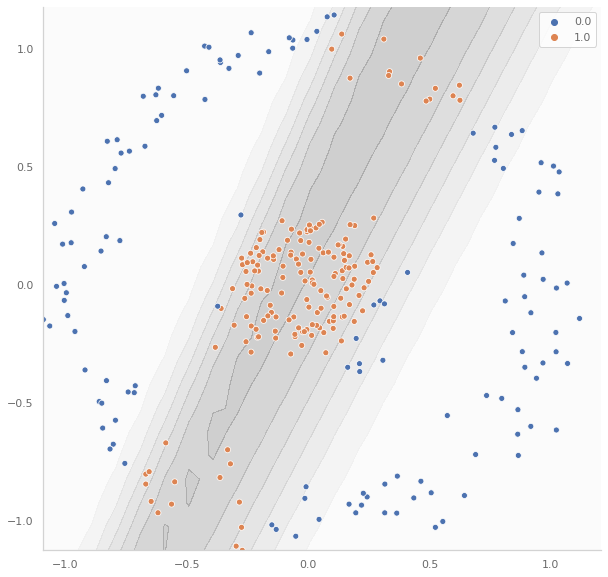

In [29]:
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.binary)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred.flatten())